# Kaggle Competition: Machine Learning from Disaster
**Problem:** Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**Proposed Solution:** Following a data science approach to clean, validate and create features to ensure a good input is obtained for the machine learning algorithms, we train and evaluate which machine learning algorithm is most suitable for this Binary Classification task.

**Results:** A Majority Voting Classifier was used and trained with the provided training dataset resulting in a score of ~0.779 on the test dataset.

## Initialization and Workspace Setup
Before starting the project, we first setup our workspace by importing necessary libraries as well as parse and understand better the data that will be processed.

##### Section Summary
In this section, the following were the outcomes:
- Imported necessary Python libraries for this project
- Imported and parsed necessary data files into 2 dataframes (*data_train* & *data_test*) ready for manipulation

In [1]:
# Import Essential Tools and Utilities
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Cross Validation Methods
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('./Data/titanic_train.csv')
data_test = pd.read_csv('./Data/titanic_test.csv')
data_list = [data_train, data_test]

print(f"Training Data Shape: {data_train.shape}")
print(f"Test Data Shape: {data_test.shape}")

Training Data Shape: (891, 12)
Test Data Shape: (418, 11)


In [3]:
data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S


Dataset Columns Description:
- **Survived**: Measure if the passenger survived or not (0=No, 1=Yes)
- **Pclass**: Proxy for socio-economic status (SES) based on ticket class (1=1st, 2=2nd, 3=3rd)
- **Name**: Name of the passenger
- **Sex**: Gender of the passenger
- **Age**: Age of the passenger
- **sibsp**: Number of siblings/spouses abroad the Titanic
- **parch**: Number of parents/children aboard the Titanic
- **ticket**: Ticket Number
- **Fare**: Passenger fare
- **Cabin**: Cabin number that approximates location aboard the Titanic
- **Embarked**: Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)

## Providing High-Quality Inputs (Data Cleaning)
Before training models with the data, the immediate step is to clean and validate the data to ensure high-quality data. This is achieved by passing a set of quality criteria including:
- Validity: The degree to which the measure conforms to defined business rules or constraints.
- Accuracy: The degree of a measure to a standard or a true value.
- Completeness: The degree to which all required measures are known.
- Consistency: The degree to which a set of measures are equivalent in across systems.
- Uniformity: The degree to which a set of data measures are specified using the same unit of measure in all systems.
Thus as such, we first perform some steps to ensure the completeness of the data

### Data Completing
So the first thing to do is to check the data for "holes" provided by Null values, invalid inputs or etc. And to do that, the fastest method is to have a quick summary overview of the dataset. During this process, we will also be keeping an eye out on the Accuracy, Consistency and Uniformity of the data.

##### Section Summary
In this section, the following were the outcomes:
- Filled Null values for **Age**, **Cabin** and **Fare** columns with the Median of its respective column.
- Dropped **PassengerId**, **Ticket** columns as they mainly act as unique identifiers
- Dropped **Cabin** column because of too much missing data

In [4]:
# We immediately check our dataframe for "Empty" or "Missing" values.
print(f"Training Data Columns with Null Values:")
print("-"*20)
print(data_train.isnull().sum())
print("\n")
print(f"Test Data Columns with Null Values:")
print("-"*20)
print(data_test.isnull().sum())

# Then we try and understand our dataset by getting the description of the data.
data_train.describe(include = 'all')

Training Data Columns with Null Values:
--------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Test Data Columns with Null Values:
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# We use another cell here for a prettier print of the pandas dataframe of the Test dataset
data_test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Spector, Mr. Woolf",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


From the above results and description, it's clear which columns need alterations are:
- **Age**, **Embarked**, **Fare (Test dataset only)**: Incomplete data replaced using the Median of the available dataset
- **Cabin**: As there is too much missing data, it is better to ignore this dataset.
- **PassengerId** & **Ticket**: As these two columns seem to be unique identifiers for the passengers, these columns may not contribute to their survival.

As a result, the following steps implement those alterations to both the training and test datasets.

Additional notes:
- The **Cabin** column vaguely implies the Pclass and the passenger's location which could be useful information but as there is not enough information, this column is ignored in this analysis.
- The **Ticket** column could contain hidden information but is not included in this analysis because there are no immediately obvious or strong correlation.
- From the data descriptions, the data seems to be Accurate, Consistent and Uniform as there is no clear discrepencies found. Hence there might not be a need to do Data Correction.

In [6]:
for dataframe in data_list:
    # Thus for each loaded dataframe, fill the "Empty" cells with the Median of the column.
    dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)
    dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0], inplace=True)
    dataframe['Fare'].fillna(dataframe['Fare'].median(), inplace=True)
    
    # Remove the Ticket and Cabin columns as they do not contribute to the passenger's survival
    dataframe.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
    
# Remove the PassengerId only for Train Dataset as the submission still requires the PassengerId for submission
data_train.drop('PassengerId', axis=1, inplace=True)

# Reprint the data to have a look at the "Clean" data
print(f"Training Data Columns with Null Values:")
print("-"*20)
print(data_train.isnull().sum())
print("\n")
print(f"Test Data Columns with Null Values:")
print("-"*20)
print(data_test.isnull().sum())

data_train.describe(include = 'all')

Training Data Columns with Null Values:
--------------------
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Test Data Columns with Null Values:
--------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN


### Data Validation
As the Dataset is now Complete (no "holes"), we move on to validate the dataset. This is ensure to that all the data is within the expected range of the problem. Following the description of the data from the section above, there are no obvious discrepencies and all values are within the expected range. However, for further validation for Consistency, this section will validate the **Sex** by using the titles in the **Name** of the passenger. 

Another purpose of this section is to start hypothesizing relationships and correlations between the columns to start informing our decision on which cells to alter, keep and remove to provide high-quality relevant data to the machine learning algorithm.

##### Section Summary
In this section, the following were the outcomes:
- Created the **Title** column by extracting the titles from the **Name** column
- Created the **Family** column by combining the **SibSp** and **Parch** columns
- Validated **Sex** column against **Title** column
- Dropped the **Name** column as the **Title** column contains the necessary information

In [7]:
# Use Regular Expression to extract all titles by selecting the word attached with a period.
data_train['Title'] = data_train['Name'].map(lambda x: re.search("(\w*)(?=\.)",x)[0])
data_test['Title'] = data_test['Name'].map(lambda x: re.search("(\w*)(?=\.)",x)[0])
title_list = np.unique(pd.concat([data_train['Title'], data_test['Title']]))
print(title_list)

['Capt' 'Col' 'Countess' 'Don' 'Dona' 'Dr' 'Jonkheer' 'Lady' 'Major'
 'Master' 'Miss' 'Mlle' 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir']


From this title list, we can use it to validate gender, at least for the ones we are certain:
- Male: Don, Jonkheer, Master, Mr, Sir
- Female: Countess, Dona, Lady, Miss, Mlle (Mademoiselle), Mme (Mesdames), Mrs, Ms
- Neutral: Capt, Col, Dr, Major, Rev

Additional Notes:
- There may be further correlations and relationships between the **Title** and **Pclass** or **Fare**.
- The **Name** column may no longer be important as there is the **Title** feature.

In [8]:
# Function to Validate if the Sex matches with the Title provided
def validate_sex(input_list):
    [gender, title] = input_list
    if gender == "male" and title in ['Don', 'Jonkheer', 'Master', 'Mr', 'Sir']:
        return "male"
    elif gender == "female" and title in ['Countess', 'Dona', 'Lady', 'Miss', 'Mlle', 'Mme', 'Mrs', 'Ms']:
        return "female"
    elif title in ['Capt', 'Col', 'Dr', 'Major', 'Rev']:
        return gender
    else:
        return "other"

for dataframe in data_list:
    # Create a new column for the Training Dataset to Validate Sex
    dataframe["v_Sex"] = dataframe[["Sex","Title"]].apply(validate_sex,axis=1)
    print("Sex Validation:")
    print("-"*20)
    print(dataframe[dataframe["v_Sex"] != dataframe["Sex"]])
    print("\n")

Sex Validation:
--------------------
Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked, Title, v_Sex]
Index: []


Sex Validation:
--------------------
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked, Title, v_Sex]
Index: []




As both the datasets do not contain any obvious discrepencies between the Title and Sex, the provided Sex data appears to be valid. As such, the newly created **v_Sex** column is removed.

Furthermore, we drop the **Name** column as it acts a unique identifier and does not provide any more information than the extracted **Title** column.

Additionally a new column can be created by combining both the **SibSp** and **Parch** (Siblings/Spouses and Parent/Child) columns respectively into a **Family** column to represent the family size of the passenger. We won't immediately drop the **SibSp** and **Parch** columns as there still might be a correlation between this and the survival rate.

In [9]:
for dataframe in [data_train, data_test]:
    # Drop both the newly created columns
    dataframe.drop(["v_Sex", "Name"], axis=1, inplace=True)
    
    # Add a new column for "Family" by combining the SibSp and Parch columns
    dataframe["Family"] = dataframe["SibSp"] + dataframe["Parch"] + 1

### Data Exploration and Feature Creation
So now that we have confirmed (to the best of our ability so far) that the data is "clean", we further delve into the data using visualization tools to help inform on Feature Selection and Creation.

##### Section Summary
In this section, the following were the outcomes:
- Transformed the **Fare** column to represent the log values instead.
- Correlation between **Sex** and **Survived** is apparent.

In [10]:
print(data_train.keys())

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Family'],
      dtype='object')


The data is split into 3 categories for easier visualization and analysis:
- Categorical: Sex, Title, Embarked
- Numerical (Discreet): Survived, SibSp, Parch
- Numerical (Continuous): Age, Fare

The first step is to plot the Histograms and Boxplots (or Violin plots) to better observe the distributions and how to better transform the data. We first begin plotting these for the Numerical categories.

For the Categorical and Numerical (Discreet) categories, the correlation between the column and the **Survived** is best represented by a bar

As the columns **Age** and **Fare** are continuous, these two columns need to be appropriately binned before further analysis. Hence to get a preliminary feel of which columns are correlated with the Survival, the values are grouped and the average (mean) of the **Survived** is calculated.

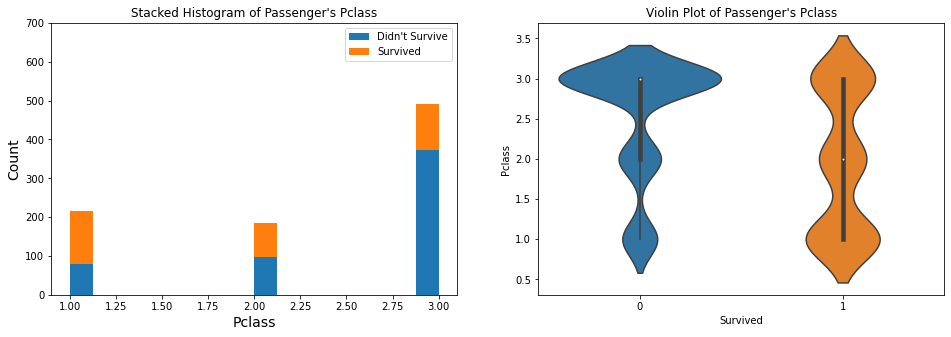

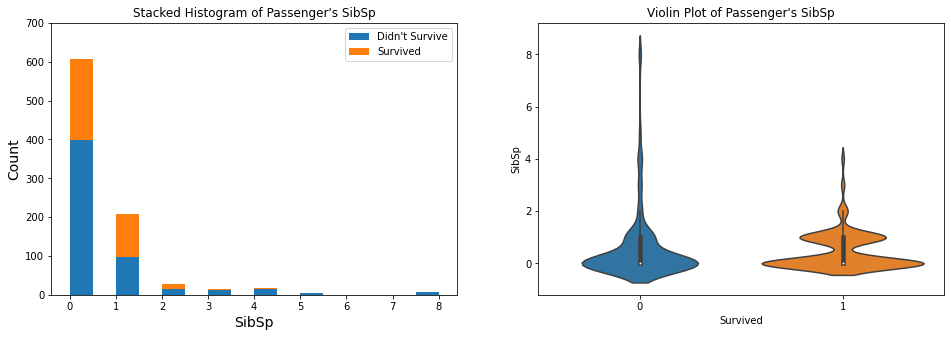

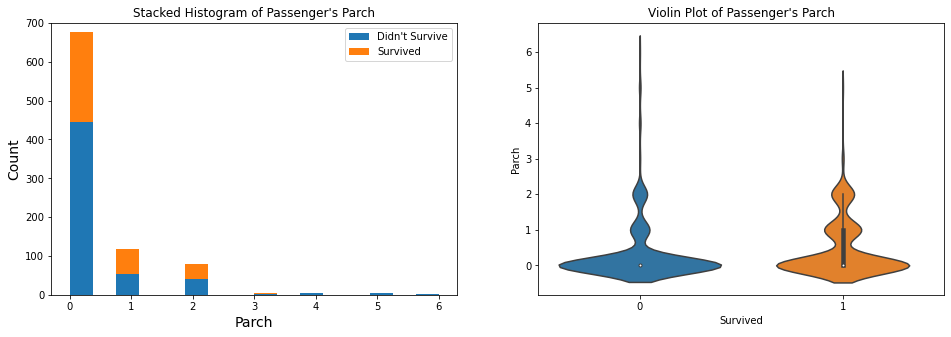

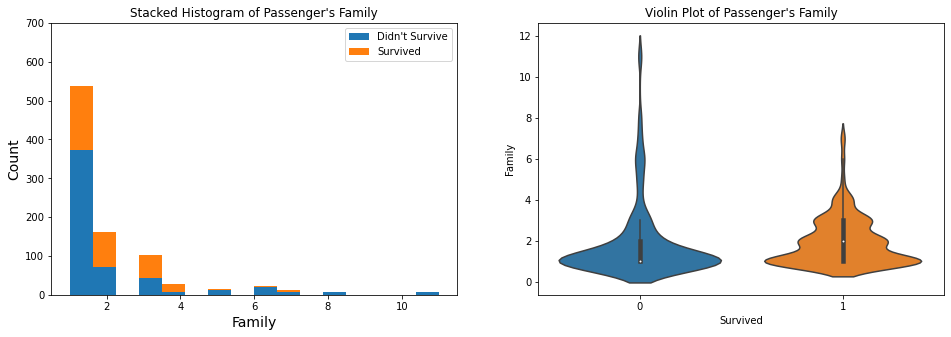

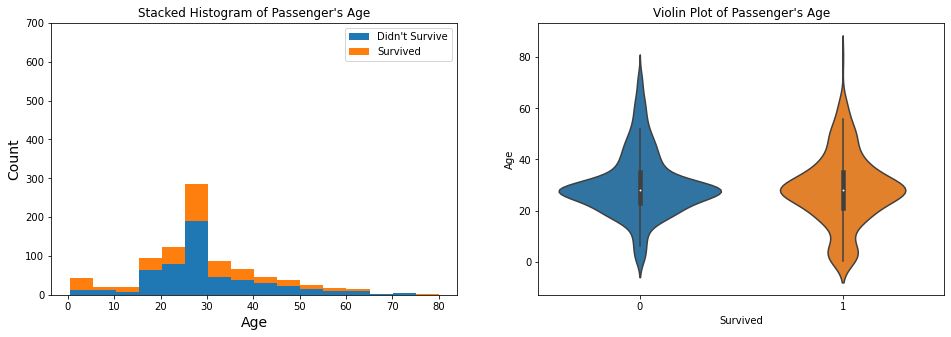

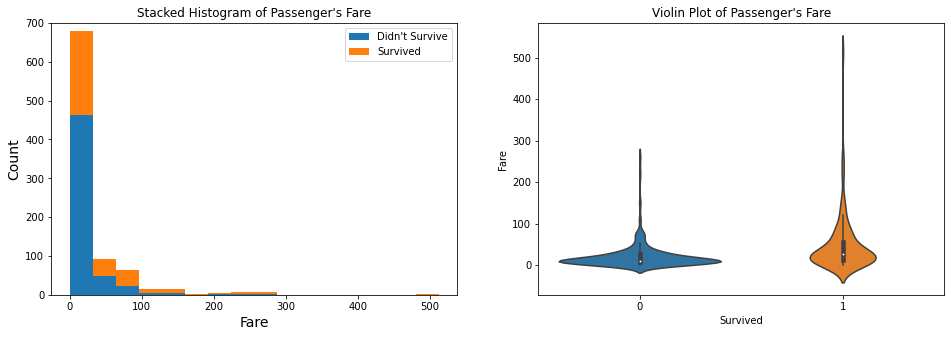

In [11]:
# categories = ["Age", "Fare", ]
categories = ['Pclass', 'SibSp', 'Parch', 'Family', 'Age', 'Fare']
survived_mask = data_train["Survived"] == 1

for category in categories:
    surv_split = np.array([data_train[~survived_mask][category], data_train[survived_mask][category]], dtype="object")

    plt.figure(figsize=(16,5))

    plt.subplot(1,2,1)
    plt.hist(surv_split, 16, label=['Didn\'t Survive','Survived'], stacked=True)
    plt.xlabel(category, size=14)
    plt.ylabel("Count", size=14)
    plt.title(f"Stacked Histogram of Passenger's {category}")
    plt.legend(loc='upper right')
    plt.ylim([0, 700])

    plt.subplot(1,2,2)
    sns.violinplot(x="Survived", y=category, data=data_train)
    plt.title(f"Violin Plot of Passenger's {category}")

    plt.show()

From the plots above, there are no obvious trends for any of the plots except (arguably) the **Pclass**. Within reasonable doubt, there appears to have a relationship such that the higher classes have a higher chance of surviving. However, regarding the rest of the plots (**SibSp**, **Parch**, **Family** and **Fare**) there are no clear relationship between them and the Survival rate.

As the **Fare** column's distribution is widely spread out, we attempt to transform the values to a Log scale to try and fit the data to an normal distribution.

In [12]:
for dataframe in data_list:
    dataframe["Fare_log"] = dataframe["Fare"].apply(lambda x: np.log(x) if (x != 0) else 0)

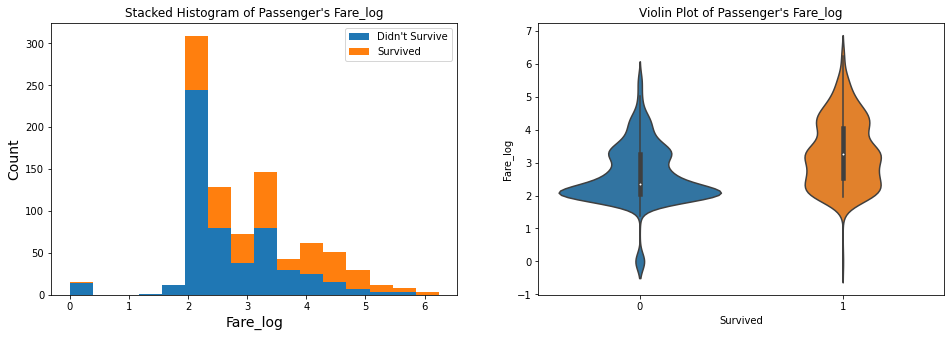

In [13]:
surv_split = np.array([data_train[~survived_mask]["Fare_log"], data_train[survived_mask]["Fare_log"]], dtype="object")

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.hist(surv_split, 16, label=['Didn\'t Survive','Survived'], stacked=True)
plt.xlabel("Fare_log", size=14)
plt.ylabel("Count", size=14)
plt.title(f"Stacked Histogram of Passenger's Fare_log")
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.violinplot(x="Survived", y="Fare_log", data=data_train)
plt.title(f"Violin Plot of Passenger's Fare_log")

plt.show()

Transforming the **Fare** column into **Fare_log** does make the data seem more like a normal distribution. However, from this graph, there is no clear correlation between survival and the fares paid but as the **Fare_log** is a better representation of the data, we will transform our **Fare** column into its log values.

In [14]:
for dataframe in data_list:
    dataframe["Fare"] = dataframe["Fare_log"]
    dataframe.drop("Fare_log", axis=1, inplace=True)

Now we plot the same Histogram and Violinplot for the categorical data, except instead of seperating the violinplots based on Survived status, we seperate them according to the categories and plot them against the Survived to show the distribution for each category instead.

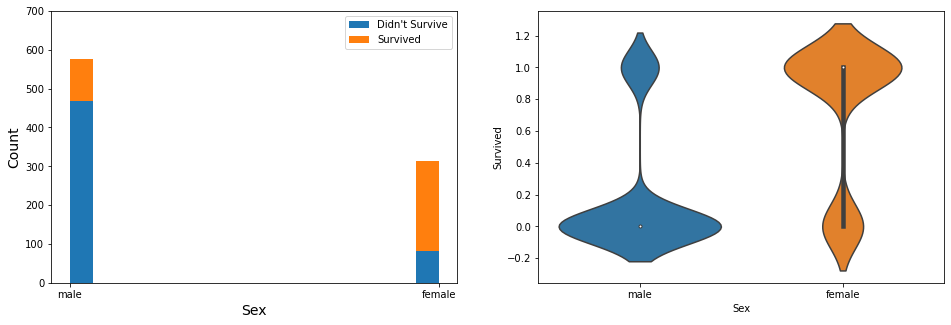

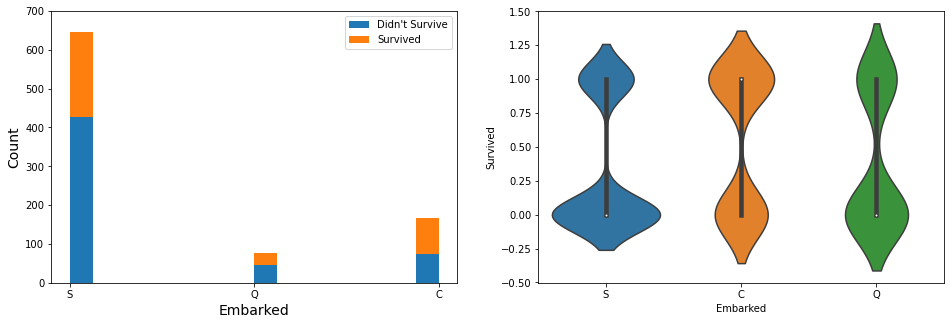

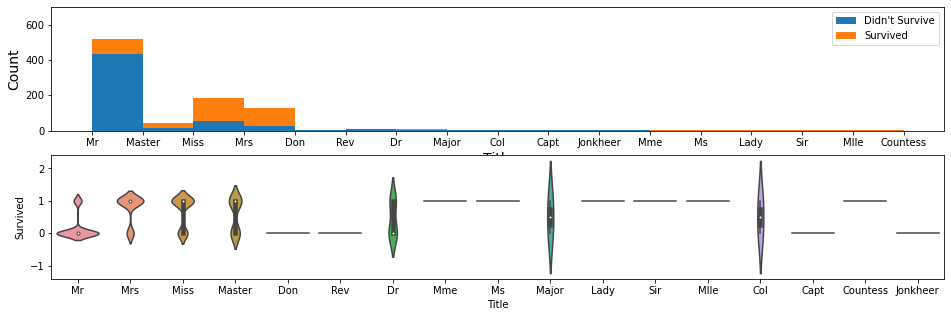

In [15]:
categories = ['Sex', 'Embarked', 'Title']
survived_mask = data_train["Survived"] == 1

for category in categories:
    surv_split = np.array([data_train[~survived_mask][category], data_train[survived_mask][category]], dtype="object")

    plt.figure(figsize=(16,5))

    if category == 'Title': plt.subplot(2,1,1)
    else: plt.subplot(1,2,1)
    plt.hist(surv_split, 16, label=['Didn\'t Survive','Survived'], stacked=True)
    plt.xlabel(category, size=14)
    plt.ylabel("Count", size=14)
#     plt.title(f"Stacked Histogram of Passenger's {category}")
    plt.legend(loc='upper right')
    plt.ylim([0, 700])

    if category == 'Title': plt.subplot(2,1,2)
    else: plt.subplot(1,2,2)
    sns.violinplot(x=category, y="Survived", data=data_train)
#     plt.title(f"Violin Plot of Passenger's {category}")

    plt.show()

Both the **Sex** and **Title** plots seem to suggest that there is a high correlation between the sex of the passenger and survival chance. Regarding the **Embarked** plot, there does not appear to have any obvious correlation.

### Data Conversion
In this section, we convert the data from Categorical columns into a Numerical representation and observe through visualization how that may impact the data in relation to the plots above. This involves converting the **Sex**, **Title** and **Embarked** columns. 

Converting **Sex** and **Embarked** are straightforward and converting the strings into numerical categories. We can do the same for **Title** but may lose a lot of information and may overcomplicate the learning process for the machine learning algorithms. Alternatively, we could potentially convert each Title as a column in itself and set the Binary value if it is that title, however, for simplicity instead, we assume that the **Title** is heavily correlated to the **Pclass** and we explore their relationship. By doing so, we can rank **Titles** accordingly and to further retain more information, we may be able to further split them further based on **Gender**.

##### Section Summary
In this section, the following were the outcomes:
- Split and converted the **Title** column into numerical category with 5 categories that were based on the Pclass and Gender.
- Converted **Sex** and **Embarked** into simple numerical categories.

In [16]:
# Pivot the Table to show the average Pclass for each title and sort them accordingly
data_train[['Title', 'Pclass']].groupby(['Title'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Title,Pclass
8,Master,2.625000
12,Mr,2.410058
9,Miss,2.307692
15,Rev,2.000000
14,Ms,2.000000
13,Mrs,2.000000
4,Dr,1.285714
11,Mme,1.000000
10,Mlle,1.000000
0,Capt,1.000000


First, we split the **Title** into two categories according to **Pclass** such that:
- Common = [Pclass >= 2]
- First Class = [Pclass < 2]

Then we further categorize the **Title** according to **Sex** to obtain this list:
- 0: (Common Male) - Mr, Master, Rev
- 1: (First Class Male) - Jonkheer, Don, Sir
- 2: (First Class Neutral) - Capt, Col, Major, Dr
- 3: (First Class Female) - Mme, Mlle, Lady, Countess, Dona
- 4: (Common Female)- Miss, Ms, Mrs

Following this categorical list, we the convert the data for **Title** and for **Sex** we convert (*male* -> 0; *female* -> 1) and for **Embarked** we convert (*S* -> 0; *C* -> 1; *Q* -> 2).

P.S. As the Test dataset has a unique title ("Dona"), we also include it in the above list.

In [17]:
title_dict = {
    'Mr': 0,
    'Master': 0,
    'Rev': 0,
    'Jonkheer': 1,
    'Don': 1,
    'Sir': 1,
    'Capt': 2,
    'Col': 2,
    'Major': 2,
    'Dr': 2,
    'Mme': 3,
    'Mlle': 3,
    'Lady': 3,
    'Dona': 3,
    'Countess': 3,
    'Miss': 4,
    'Ms': 4,
    'Mrs': 4    
}

# Convert all data
for dataframe in data_list:
    dataframe['Title'] = dataframe['Title'].map(title_dict).fillna(2).astype(int)
    dataframe['Sex'] = dataframe['Sex'].map( {'male': 0, 'female':1} ).fillna(0).astype(int)
    dataframe['Embarked'] = dataframe['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).fillna(0).astype(int)

After converting the data, we then plot barplots for each of these columns against the **Survival** rate. However, since we are doing this, we may as well try this for the remaining columns as well.

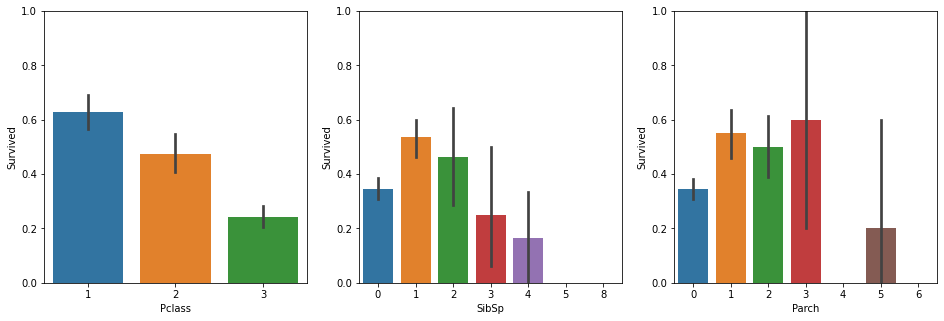

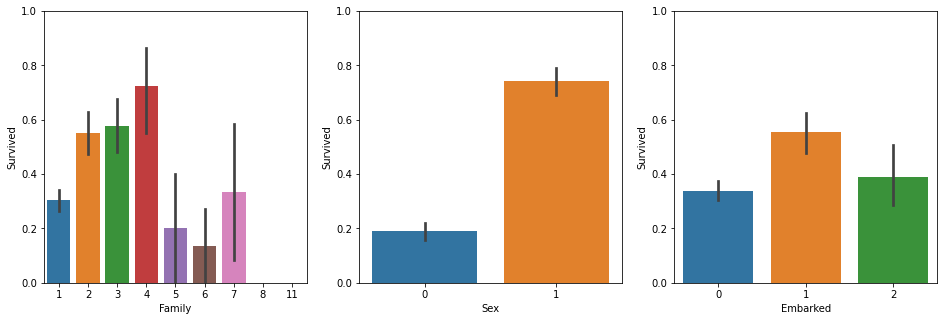

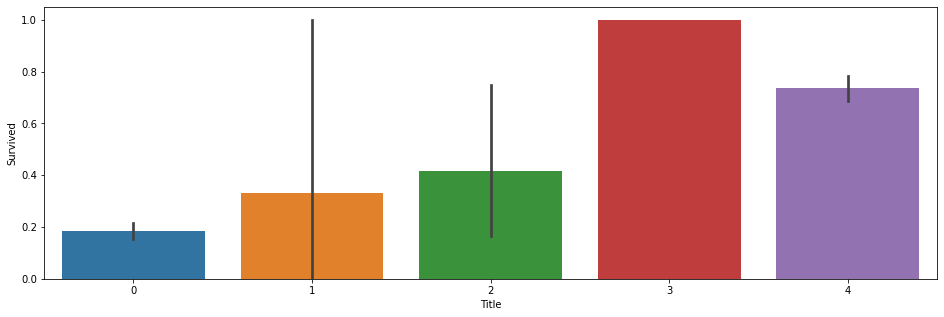

In [18]:
observed_columns = ['Pclass', 'SibSp', 'Parch', 'Family', 'Sex', 'Embarked']
index = 0
plt.figure(figsize=(16,5))

for column in observed_columns:
    plt.subplot(1,3,index%3+1)
    sns.barplot(x=column, y='Survived', data=data_train)
    plt.ylim(0,1)
    
    if index % 3 == 2:
        plt.show()
        plt.figure(figsize=(16,5))
    index += 1
    
sns.barplot(x='Title', y='Survived', data=data_train)
plt.show()

Following these plots, here are the observations:
- There is a clear correlation between **Survived** and either **Pclass** and **Sex**.
- There is still no clear correlation between **Survived** and either **SibSp**, **Parch** or **Family**.
- May be worth reordering **Embarked** conversion.
- The **Title** conversion shows clearer trends in contrast to previously.

### Data Correlation
This section is going to be short. The intention of this section is to draw correlations between columns and see if there are trends and groups between columns. This will be done by calculating the Pearson's correlation coefficient and grouping similarly correlated columns together.

It is worth noting that the most important of these correlations would be the columns relating to the **Survived** column as these columns would be a heavy driving factor for the prediction model. As such, we will identify and discuss the most prominent correlated columns.

##### Section Summary
In this section, the following were the outcomes:
- Correlation Table shows some correlated groups between columns: Sex, Socioeconomic Class and Family Size
- Dropped **Sex**, **Family** and **Embarked** columns

In [19]:
print(data_train.keys())
data_train.corr()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Family'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.331805,0.106811,0.541694,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.670489,0.045702,-0.146804,0.065997
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.264751,0.116569,0.991413,0.200988
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.112202,-0.009165,-0.064724,-0.245619
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.323214,-0.059961,0.115857,0.890712
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.336857,-0.078665,0.243862,0.783111
Fare,0.331805,-0.670489,0.264751,0.112202,0.323214,0.336857,1.000000,0.015131,0.270887,0.389193
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.015131,1.000000,0.118889,-0.080281
Title,0.541694,-0.146804,0.991413,-0.064724,0.115857,0.243862,0.270887,0.118889,1.000000,0.201014
Family,0.016639,0.065997,0.200988,-0.245619,0.890712,0.783111,0.389193,-0.080281,0.201014,1.000000


From the Pearson's Correlation table above, there are three prominent correlated groups:
- **Sex** & **Title** because they represent the gender.
- **Pclass** & **Fare** because these represent their socio-economic background.
- **SibSp**, **Parch** & **Family** as the Family column is just the sum of SibSp and Parch column to represent the family size.

From this table, it is also clear that **Sex**, **Title**, **Pclass** and **Fare** would be the largest contributors to the prediction models. However as there is a high correlation between **Sex** and **Title**, we will drop the **Sex** column as the **Title** column may provide a slightly higher level of dimensionality (5 values instead of 2) that may help improve the model. 

Furthermore, we will also remove the **Family** column as it abstracts the **SibSp** and **Parch** columns and keep these columns because while they have almost have no correlation with **Survived** they do show a small correlation with the **Fare** paid and could act as a supporting feature. A similar argument is made for **Age** as it has a small correlation with **Pclass**.

Finally we drop the **Embarked** column as there are only small correlations between this column with any other columns and hence does not seem to be a useful feature.

Additional Notes:
- **Title** is not correlated to **Pclass** which suggests that the underlying assumption when categorizing the **Title** column is flawed and should be changed. This is worth exploring in further exploration.

In [20]:
for dataframe in data_list:
    dataframe.drop(["Family", "Sex", "Embarked"], axis=1, inplace=True)

### Data Splitting
So before we train further delve into training the Machine Learning models, we first split and finalize the inputs and expected outputs. Hence this section prepares the training inputs and outputs as well as the testing inputs.

##### Section Summary
In this section, the following were the outcomes:
- Training & Test Inputs prepared
- Training Outputs prepared

In [21]:
data_train.describe(include='all')

,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,2.893846,1.429854
std,0.486592,0.836071,13.019697,1.102743,0.806057,1.002899,1.896883
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,2.068177,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,2.670985,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,3.433987,4.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,6.238967,4.000000


In [22]:
data_test.describe(include='all')

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,2.945709,1.466507
std,120.810458,0.841838,12.703770,0.896760,0.981429,1.006279,1.920501
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,2.066331,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,2.670985,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,3.449093,4.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,6.238967,4.000000


In [23]:
X_train = data_train.drop(["Survived"], axis=1)
Y_train = data_train["Survived"]
X_test = data_test.drop("PassengerId", axis=1)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (891, 6)
Y_train shape: (891,)
X_test shape: (418, 6)


## Machine Learning Algorithm Selection
As the data is now clean and split, we now decide on which machine learning algorithm would best fit this Binary Classification task. The immediate list of algorithms for this task to test would be:
- Logistic Regression
- Support Vector Classification (SVC)
- Linear SVC
- K-Neighbors Classifier
- Gaussian Naive Bayes
- Perceptron
- Multi-layer Perceptron (MLP) Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- Stochastic Gradient Descent (SGD) Classifier
- Random Forest Classifier
- Decision Tree Classifier

Hence, we use the default values of each algorithm to test the baseline performance from blindly testing the algorithms to inform our decision on which models might be able to perform better with optimization and fine-tuning.

In [24]:
model_list = [
    LogisticRegression(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    Perceptron(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

cv_split = StratifiedShuffleSplit(n_splits=10, test_size=0.6, train_size=0.3, random_state=10)

In [25]:
result_columns = ['Name', 'Params', 'TrainScore', 'TestScore', 'TestStd', 'TrainTime']
model_results = pd.DataFrame(columns=result_columns)

for model in model_list:
    cv_results = cross_validate(model, X_train, Y_train, cv=cv_split, return_train_score=True)
    
#     name = model.__class__.__name__
#     params = str(model.get_params())
#     train_score = round(cv_results['train_score'].mean(),2)
#     test_score = round(cv_results['test_score'].mean(),2)
#     train_time = cv_results['fit_time'].mean()
    
    result_row= {
        'Name': model.__class__.__name__, 
        'Params': str(model.get_params()), 
        'TrainScore': round(cv_results['train_score'].mean(),3), 
        'TestScore': round(cv_results['test_score'].mean(),3), 
        'TestStd': round(cv_results['test_score'].std(),4),
        'TrainTime': cv_results['fit_time'].mean()
    }
    
    model_results.loc[model_results.shape[0]] = result_row
    
#     print(f"{model.__class__.__name__}")
#     print("-"*20)
#     print(f"{cv_results}")
#     print(f"Mean Train Score: {cv_results['fit_time'].mean()}")
#     print(f"Mean Train Score: {round(cv_results['train_score'].mean(),2)}")
#     print(f"Mean Test Score: {round(cv_results['test_score'].mean(),2)}")
#     print("\n")

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase th

In [26]:
model_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
model_results

,Name,Params,TrainScore,TestScore,TestStd,TrainTime
6,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.825,0.813,0.0069,0.396942
8,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.939,0.797,0.0156,0.073215
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.801,0.795,0.0076,0.019115
10,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.990,0.789,0.0151,0.156143
3,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.834,0.784,0.0138,0.003392
4,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.773,0.781,0.0167,0.002892
1,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.784,0.780,0.0104,0.004597
7,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.855,0.777,0.0133,0.078000
2,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.754,0.749,0.0447,0.011616
11,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.990,0.743,0.0165,0.003192


Having performed cross-validation across these models and observing these results, it seems that most of these models are able to perform within close Test Accuracies. However, each model has it's own difference between the Train and Test scores which could benefit us if we use multiple estimators along with a majority voting strategy.

Hence to optimize and improve the accuracy of these models, we will attempt to optimize each individual model and use a Majority Voting Classifier and compare these results to each of the base models. Furthermore, as the results of the table above may vary, the selected 5 models to be explored are:
- MLPClassifier
- GradientBoostingClassifier
- LogisticRegression
- KNeighborsClassifier
- RandomForestClassifier

However, before going through the hassle of optimizing 5 different algorithms, we first validate that the idea of using the Voting Classifier would indeed help improve the accuracy. Hence we perform an initial test using the default values of each estimator.

In [27]:
from sklearn.ensemble import VotingClassifier
clf1 = MLPClassifier()
clf2 = GradientBoostingClassifier()
clf3 = LogisticRegression()
clf4 = KNeighborsClassifier()
clf5 = RandomForestClassifier()

vot_clf = VotingClassifier(estimators=[('mlp', clf1), ('gbc', clf2), ('lr', clf3), ('knc', clf4), ('rfc', clf5)], voting='hard')

cv_results = cross_validate(vot_clf, X_train, Y_train, cv=cv_split, return_train_score=True)

result_row= {
    'Name': vot_clf.__class__.__name__, 
    'Params': str(vot_clf.get_params()), 
    'TrainScore': round(cv_results['train_score'].mean(),3), 
    'TestScore': round(cv_results['test_score'].mean(),3), 
    'TestStd': round(cv_results['test_score'].std(),4),
    'TrainTime': cv_results['fit_time'].mean()
}

model_results.loc[model_results.shape[0]] = result_row

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

In [28]:
model_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
model_results

,Name,Params,TrainScore,TestScore,TestStd,TrainTime
12,VotingClassifier,"{'estimators': [('mlp', MLPClassifier()), ('gb...",0.874,0.817,0.0136,0.648964
6,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.825,0.813,0.0069,0.396942
8,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.939,0.797,0.0156,0.073215
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.801,0.795,0.0076,0.019115
10,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.990,0.789,0.0151,0.156143
3,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.834,0.784,0.0138,0.003392
4,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.773,0.781,0.0167,0.002892
1,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.784,0.780,0.0104,0.004597
7,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.855,0.777,0.0133,0.078000
2,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.754,0.749,0.0447,0.011616


As shown from above, there is a slight improvement from using the Voting Classifier and we hence proceed to optimize the individual classifiers in hopes of further improving this ensemble machine learning algorithm.

### MLP Classifier Optimization
So for the Multi-Layer Perceptron, we first observe the available parameters to tweak and see which parameters should be tweaked. Normally for an MLP, it would be the Activation Function, Alpha term (the learning penalty) and the number of layers.

In [30]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [31]:
MLPClf_params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [32]:
GSCV_MLP = GridSearchCV(MLPClassifier(max_iter=500), MLPClf_params, cv=cv_split, return_train_score=True)
GSCV_MLP.fit(X_train, Y_train)

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn'

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn'

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.6,
            train_size=0.3),
             estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             return_train_score=True)

In [33]:
result_columns = ['Params', 'TrainScore', 'TestScore', 'TestStd', 'TrainTime']
GSCV_MLP_results = pd.DataFrame(columns=result_columns)

zipped_results = zip(GSCV_MLP.cv_results_["params"], GSCV_MLP.cv_results_["mean_train_score"], GSCV_MLP.cv_results_["mean_test_score"], GSCV_MLP.cv_results_["std_test_score"], GSCV_MLP.cv_results_["mean_fit_time"])
for param, train_score, test_score, test_std, train_time in zipped_results:
    result_row= {
        'Params': param, 
        'TrainScore': round(train_score,3),
        'TestScore': round(test_score,3), 
        'TestStd': round(test_std,3),
        'TrainTime': train_time
    }
    
    GSCV_MLP_results.loc[GSCV_MLP_results.shape[0]] = result_row

# Baseline parameter set
MLPClf_base_param = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001, 'learning_rate': 'constant'}
df_mask = GSCV_MLP_results['Params'] == MLPClf_base_param
print(f"Baseline Score: {GSCV_MLP_results[df_mask]['TestScore'].values[0]}")
print(f"Baseline Params: {GSCV_MLP_results[df_mask]['Params'].values[0]}")    

# Best parameter set
print(f"Best Score: {GSCV_MLP.best_score_}")
print(f"Best Params: {GSCV_MLP.best_params_}")

print(f"Score Diff: {abs(GSCV_MLP.best_score_ - GSCV_MLP_results[df_mask]['TestScore'].values[0])}")

GSCV_MLP_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
GSCV_MLP_results

Baseline Score: 0.809
Baseline Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 0.8117757009345794
Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
Score Diff: 0.0027757009345793504


,Params,TrainScore,TestScore,TestStd,TrainTime
4,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.816,0.812,0.011,1.339972
2,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.818,0.809,0.016,1.331776
33,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.835,0.809,0.016,0.709450
47,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.832,0.808,0.014,0.727696
45,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.835,0.808,0.012,0.747847
6,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.819,0.808,0.012,1.563546
35,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.835,0.808,0.018,0.647773
16,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.816,0.807,0.015,1.330495
14,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.814,0.806,0.014,1.304974
39,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.838,0.806,0.014,0.628953


Hence from the adjustments above, the optimal parameters for the MLP Classifier are:
- activation = 'tanh'
- alpha = 0.0001
- hidden_layer_sizes = (50,100,50)
- learning_rate = 'constant'
- solver = 'sgd'

These hyperparameters boosts the TestScore by ~0.002, which is not much but is still an overall improvement.

### Gradient Boosting Classifier Optimization

In [34]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [35]:
GBClf_params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'loss': ['deviance', 'exponential'],
    'max_depth': [1, 3, 6],
    'n_estimators': [50, 100, 250, 500]
}

In [36]:
GSCV_GB = GridSearchCV(GradientBoostingClassifier(), GBClf_params, cv=cv_split, return_train_score=True)
GSCV_GB.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.6,
            train_size=0.3),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [1, 3, 6],
                         'n_estimators': [50, 100, 250, 500]},
             return_train_score=True)

In [37]:
result_columns = ['Params', 'TrainScore', 'TestScore', 'TestStd', 'TrainTime']
GSCV_GB_results = pd.DataFrame(columns=result_columns)

zipped_results = zip(GSCV_GB.cv_results_["params"], GSCV_GB.cv_results_["mean_train_score"], GSCV_GB.cv_results_["mean_test_score"], GSCV_GB.cv_results_["std_test_score"], GSCV_GB.cv_results_["mean_fit_time"])
for param, train_score, test_score, test_std, train_time in zipped_results:
    result_row= {
        'Params': param,
        'TrainScore': round(train_score,3),
        'TestScore': round(test_score,3), 
        'TestStd': round(test_std,3),
        'TrainTime': train_time
    }
    
    GSCV_GB_results.loc[GSCV_GB_results.shape[0]] = result_row
    
# Baseline parameter set
GBClf_base_param = {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100}
df_mask = GSCV_GB_results['Params'] == GBClf_base_param
print(f"Baseline Score: {GSCV_GB_results[df_mask]['TestScore'].values[0]}")
print(f"Baseline Params: {GSCV_GB_results[df_mask]['Params'].values[0]}")
    
# Best parameter set
print(f"Best Score: {GSCV_GB.best_score_}")
print(f"Best Params: {GSCV_GB.best_params_}")

print(f"Score Diff: {abs(GSCV_GB.best_score_ - GSCV_GB_results[df_mask]['TestScore'].values[0])}")

GSCV_GB_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
GSCV_GB_results

Baseline Score: 0.796
Baseline Params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8104672897196261
Best Params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 250}
Score Diff: 0.014467289719626075


,Params,TrainScore,TestScore,TestStd,TrainTime
6,"{'learning_rate': 0.01, 'loss': 'deviance', 'm...",0.873,0.810,0.014,0.179154
18,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.871,0.810,0.017,0.186998
40,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.895,0.809,0.014,0.039280
19,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.895,0.808,0.016,0.367991
5,"{'learning_rate': 0.01, 'loss': 'deviance', 'm...",0.846,0.806,0.015,0.074095
...,...,...,...,...,...
12,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.784,0.771,0.020,0.023756
54,"{'learning_rate': 0.5, 'loss': 'deviance', 'ma...",0.990,0.771,0.011,0.174780
66,"{'learning_rate': 0.5, 'loss': 'exponential', ...",0.990,0.768,0.013,0.183700
55,"{'learning_rate': 0.5, 'loss': 'deviance', 'ma...",0.990,0.765,0.015,0.348121


Hence from the adjustments above, the optimal parameters for the Gradient Boosting Classifier are:
- learning_rate = 0.01 
- loss = 'deviance'
- max_depth = 3
- n_estimators = 250

These hyperparameters boosts the TestScore by ~0.014, which is not much but is still an overall improvement.

### Logistic Regression Classifier Optimization

In [38]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
LRClf_params = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [40]:
GSCV_LR = GridSearchCV(LogisticRegression(max_iter=500), LRClf_params, cv=cv_split, return_train_score=True)
GSCV_LR.fit(X_train, Y_train)

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFaile

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The 

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: T

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: T

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.6,
            train_size=0.3),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True)

In [41]:
result_columns = ['Params', 'TrainScore', 'TestScore', 'TestStd', 'TrainTime']
GSCV_LR_results = pd.DataFrame(columns=result_columns)

zipped_results = zip(GSCV_LR.cv_results_["params"], GSCV_LR.cv_results_["mean_train_score"], GSCV_LR.cv_results_["mean_test_score"], GSCV_LR.cv_results_["std_test_score"], GSCV_LR.cv_results_["mean_fit_time"])
for param, train_score, test_score, test_std, train_time in zipped_results:
    result_row= {
        'Params': param,
        'TrainScore': round(train_score,3),
        'TestScore': round(test_score,3), 
        'TestStd': round(test_std,3),
        'TrainTime': train_time
    }
    
    GSCV_LR_results.loc[GSCV_LR_results.shape[0]] = result_row
    
# Baseline parameter set
LRClf_base_param = {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
df_mask = GSCV_LR_results['Params'] == LRClf_base_param
print(f"Baseline Score: {GSCV_LR_results[df_mask]['TestScore'].values[0]}")
print(f"Baseline Params: {GSCV_LR_results[df_mask]['Params'].values[0]}")
    
# Best parameter set
print(f"Best Score: {GSCV_LR.best_score_}")
print(f"Best Params: {GSCV_LR.best_params_}")

print(f"Score Diff: {abs(GSCV_LR.best_score_ - GSCV_LR_results[df_mask]['TestScore'].values[0])}")

GSCV_LR_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
GSCV_LR_results

Baseline Score: 0.795
Baseline Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7957009345794392
Best Params: {'C': 5.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Score Diff: 0.0007009345794392052


,Params,TrainScore,TestScore,TestStd,TrainTime
66,"{'C': 5.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.801,0.796,0.008,0.017654
67,"{'C': 5.0, 'penalty': 'l2', 'solver': 'libline...",0.798,0.796,0.009,0.003196
51,"{'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.801,0.796,0.007,0.018803
65,"{'C': 5.0, 'penalty': 'l2', 'solver': 'newton-...",0.801,0.796,0.008,0.019651
50,"{'C': 2.0, 'penalty': 'l2', 'solver': 'newton-...",0.801,0.796,0.007,0.017590
...,...,...,...,...,...
70,"{'C': 5.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,0.000599
71,"{'C': 5.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,0.000798
72,"{'C': 5.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,0.000898
73,"{'C': 5.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,0.000949


Hence from the adjustments above, the optimal parameters for the Logistic Regression Classifier are:
- C = 0.5
- penalty = 'l2'
- solver = 'newton-cg'

These hyperparameters boosts the TestScore by ~0.0007, which is very insignificant but still worth considering

### K-Neighbor Classifier Optimization

In [42]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
KNClf_params = {
    'leaf_size': [10, 30, 60],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'n_neighbors': [5, 10, 20],
    'weights': ['uniform', 'distance']
}

In [44]:
GSCV_KN = GridSearchCV(KNeighborsClassifier(), KNClf_params, cv=cv_split, return_train_score=True)
GSCV_KN.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.6,
            train_size=0.3),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 30, 60],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [5, 10, 20],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [45]:
result_columns = ['Params', 'TrainScore', 'TestScore', 'TestStd', 'TrainTime']
GSCV_KN_results = pd.DataFrame(columns=result_columns)

zipped_results = zip(GSCV_KN.cv_results_["params"], GSCV_KN.cv_results_["mean_train_score"], GSCV_KN.cv_results_["mean_test_score"], GSCV_KN.cv_results_["std_test_score"], GSCV_KN.cv_results_["mean_fit_time"])
for param, train_score, test_score, test_std, train_time in zipped_results:
    result_row= {
        'Params': param,
        'TrainScore': round(train_score,3),
        'TestScore': round(test_score,3), 
        'TestStd': round(test_std,3),
        'TrainTime': train_time
    }
    
    GSCV_KN_results.loc[GSCV_KN_results.shape[0]] = result_row
    
# Baseline parameter set
KNClf_base_param = {'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
df_mask = GSCV_KN_results['Params'] == KNClf_base_param
print(f"Baseline Score: {GSCV_KN_results[df_mask]['TestScore'].values[0]}")
print(f"Baseline Params: {GSCV_KN_results[df_mask]['Params'].values[0]}")
    
# Best parameter set
print(f"Best Score: {GSCV_KN.best_score_}")
print(f"Best Params: {GSCV_KN.best_params_}")

print(f"Score Diff: {abs(GSCV_KN.best_score_ - GSCV_KN_results[df_mask]['TestScore'].values[0])}")

GSCV_KN_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
GSCV_KN_results

Baseline Score: 0.784
Baseline Params: {'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score: 0.7932710280373831
Best Params: {'leaf_size': 60, 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Score Diff: 0.009271028037383111


,Params,TrainScore,TestScore,TestStd,TrainTime
44,"{'leaf_size': 60, 'metric': 'manhattan', 'n_ne...",0.817,0.793,0.013,0.003073
8,"{'leaf_size': 10, 'metric': 'manhattan', 'n_ne...",0.817,0.793,0.013,0.003192
26,"{'leaf_size': 30, 'metric': 'manhattan', 'n_ne...",0.817,0.793,0.013,0.003031
42,"{'leaf_size': 60, 'metric': 'manhattan', 'n_ne...",0.837,0.787,0.013,0.003391
6,"{'leaf_size': 10, 'metric': 'manhattan', 'n_ne...",0.836,0.787,0.013,0.003076
24,"{'leaf_size': 30, 'metric': 'manhattan', 'n_ne...",0.837,0.787,0.013,0.002992
0,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.834,0.784,0.013,0.003601
18,"{'leaf_size': 30, 'metric': 'euclidean', 'n_ne...",0.834,0.784,0.014,0.003393
36,"{'leaf_size': 60, 'metric': 'euclidean', 'n_ne...",0.833,0.784,0.014,0.002971
2,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.806,0.783,0.013,0.003141


Hence from the adjustments above, the optimal parameters for the K Neighbors Classifier are:
- leaf_size = 60 
- metric = 'manhattan'
- n_neighbors = 10
- weights = 'uniform'

These hyperparameters boosts the TestScore by ~0.009, which is not much but is still an overall improvement.

### Random Forest Classifier Optimization

In [46]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
RFClf_params = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 250, 400]
}

In [48]:
GSCV_RF = GridSearchCV(RandomForestClassifier(), RFClf_params, cv=cv_split, return_train_score=True)
GSCV_RF.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.6,
            train_size=0.3),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 250, 400]},
             return_train_score=True)

In [49]:
result_columns = ['Params', 'TrainScore', 'TestScore', 'TestStd', 'TrainTime']
GSCV_RF_results = pd.DataFrame(columns=result_columns)

zipped_results = zip(GSCV_RF.cv_results_["params"], GSCV_RF.cv_results_["mean_train_score"], GSCV_RF.cv_results_["mean_test_score"], GSCV_RF.cv_results_["std_test_score"], GSCV_RF.cv_results_["mean_fit_time"])
for param, train_score, test_score, test_std, train_time in zipped_results:
    result_row= {
        'Params': param,
        'TrainScore': round(train_score,3),
        'TestScore': round(test_score,3), 
        'TestStd': round(test_std,3),
        'TrainTime': train_time
    }
    
    GSCV_RF_results.loc[GSCV_RF_results.shape[0]] = result_row
    
# Baseline parameter set
RFClf_base_param = {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
df_mask = GSCV_RF_results['Params'] == RFClf_base_param
print(f"Baseline Score: {GSCV_RF_results[df_mask]['TestScore'].values[0]}")
print(f"Baseline Params: {GSCV_RF_results[df_mask]['Params'].values[0]}")
    
# Best parameter set
print(f"Best Score: {GSCV_RF.best_score_}")
print(f"Best Params: {GSCV_RF.best_params_}")

print(f"Score Diff: {abs(GSCV_RF.best_score_ - GSCV_RF_results[df_mask]['TestScore'].values[0])}")

GSCV_RF_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
GSCV_RF_results

Baseline Score: 0.788
Baseline Params: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
Best Score: 0.7902803738317757
Best Params: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 250}
Score Diff: 0.002280373831775706


,Params,TrainScore,TestScore,TestStd,TrainTime
6,"{'bootstrap': True, 'criterion': 'entropy', 'n...",0.990,0.790,0.016,0.402076
4,"{'bootstrap': True, 'criterion': 'entropy', 'n...",0.989,0.789,0.016,0.086091
1,"{'bootstrap': True, 'criterion': 'gini', 'n_es...",0.990,0.788,0.013,0.156611
7,"{'bootstrap': True, 'criterion': 'entropy', 'n...",0.990,0.788,0.018,0.638553
2,"{'bootstrap': True, 'criterion': 'gini', 'n_es...",0.990,0.787,0.015,0.384796
5,"{'bootstrap': True, 'criterion': 'entropy', 'n...",0.990,0.787,0.015,0.162144
3,"{'bootstrap': True, 'criterion': 'gini', 'n_es...",0.990,0.786,0.016,0.625333
0,"{'bootstrap': True, 'criterion': 'gini', 'n_es...",0.989,0.784,0.017,0.079892
12,"{'bootstrap': False, 'criterion': 'entropy', '...",0.990,0.777,0.013,0.067309
15,"{'bootstrap': False, 'criterion': 'entropy', '...",0.990,0.777,0.015,0.525939


Hence from the adjustments above, the optimal parameters for the Random Forest Classifier are:
- bootstrap = True
- criterion = 'entropy'
- n_estimators = 250

These hyperparameters boosts the TestScore by ~0.002, which is not much but is still an overall improvement.

### Voting Classifier Optimization
Well there is not much to optimize in the voting classifier besides using the optimal estimators and hoping for the best, so that's what this section does

In [50]:
print(GSCV_MLP.best_params_)
print(GSCV_GB.best_params_)
print(GSCV_LR.best_params_)
print(GSCV_KN.best_params_)
print(GSCV_RF.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
{'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 250}
{'C': 5.0, 'penalty': 'l2', 'solver': 'newton-cg'}
{'leaf_size': 60, 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 250}


In [51]:
from sklearn.ensemble import VotingClassifier
clf1 = MLPClassifier(max_iter=500, **GSCV_MLP.best_params_)
clf2 = GradientBoostingClassifier(**GSCV_GB.best_params_)
clf3 = LogisticRegression(max_iter=500, **GSCV_LR.best_params_)
clf4 = KNeighborsClassifier(**GSCV_KN.best_params_)
clf5 = RandomForestClassifier(**GSCV_RF.best_params_)

vot_clf = VotingClassifier(estimators=[('mlp', clf1), ('gbc', clf2), ('lr', clf3), ('knc', clf4), ('rfc', clf5)], voting='hard')

cv_results = cross_validate(vot_clf, X_train, Y_train, cv=cv_split, return_train_score=True)

result_row= {
    'Name': vot_clf.__class__.__name__ + str(2), 
    'Params': str(vot_clf.get_params()), 
    'TrainScore': round(cv_results['train_score'].mean(),3), 
    'TestScore': round(cv_results['test_score'].mean(),3), 
    'TestStd': round(cv_results['test_score'].std(),4),
    'TrainTime': cv_results['fit_time'].mean()
}

model_results.loc[model_results.shape[0]] = result_row

d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programdata\anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
model_results.sort_values(by = ['TestScore'], ascending = False, inplace = True)
model_results

,Name,Params,TrainScore,TestScore,TestStd,TrainTime
13,VotingClassifier3,"{'estimators': [('mlp', MLPClassifier(activati...",0.853,0.818,0.0101,1.878695
12,VotingClassifier,"{'estimators': [('mlp', MLPClassifier()), ('gb...",0.874,0.817,0.0136,0.648964
6,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.825,0.813,0.0069,0.396942
8,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.939,0.797,0.0156,0.073215
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.801,0.795,0.0076,0.019115
10,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.990,0.789,0.0151,0.156143
3,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.834,0.784,0.0138,0.003392
4,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.773,0.781,0.0167,0.002892
1,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.784,0.780,0.0104,0.004597
7,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.855,0.777,0.0133,0.078000


## Final Results
As to be expected, the optimized Voting Classifier outperforms the base (at least in this run). Whilst it improved the TestScore by a mere 0.001, it also decreased the TrainScore by ~0.02 which would suggest that the model became less biased and more well fitted (neither over nor under fitted). 

Hence, satisfied with the results, we then use this Voting Classifier model to predict the Survival of the Test Dataset.

In [54]:
vot_clf.fit(X_train, Y_train)
Y_pred = vot_clf.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./titanic_submission.csv', index=False)

At the time of submission, this results placed me in rank 5087 with a score of 0.77990. 

This Voting Classifier method improved upon my initial submission which was to just use the base Random Tree Classifier that scored 0.74880.